In [108]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
data = datasets.load_iris()

In [4]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df = data.data

In [7]:
target_values = data.target

In [8]:
df = pd.DataFrame(df)

In [9]:
df.head(6)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4


In [10]:
col_names = data.feature_names

In [11]:
df.columns = col_names

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
name_value_dict = {
    data.target_names[0]:0,
    data.target_names[1]:1,
    data.target_names[2]:2
}

In [14]:
name_value_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [15]:
df.shape

(150, 4)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [17]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


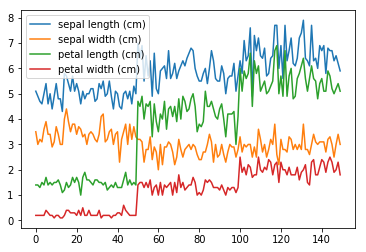

In [21]:
df.plot()

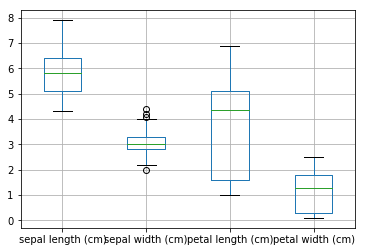

In [25]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5dd7c970f0>,
      dtype=object)

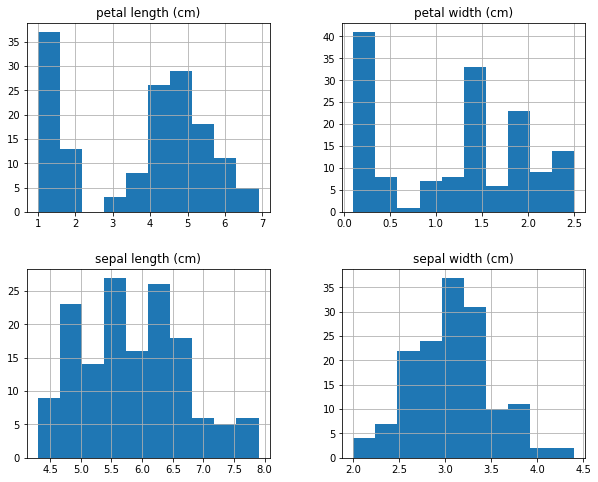

In [29]:
df.hist(figsize=(10,8))

In [40]:
df_with_target = df
df_with_target['Species'] = target_values

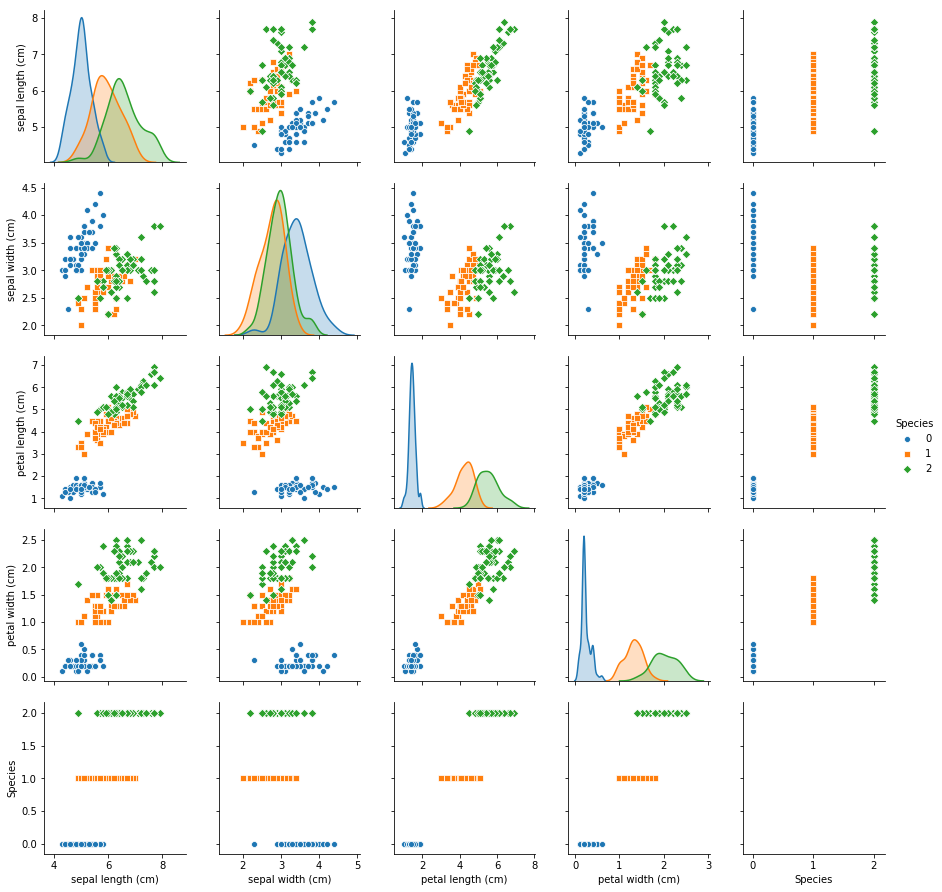

In [45]:
sns.pairplot(df_with_target,hue='Species',markers=["o", "s", "D"])

/home/deepanshu/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/deepanshu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/deepanshu/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/deepanshu/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **pa

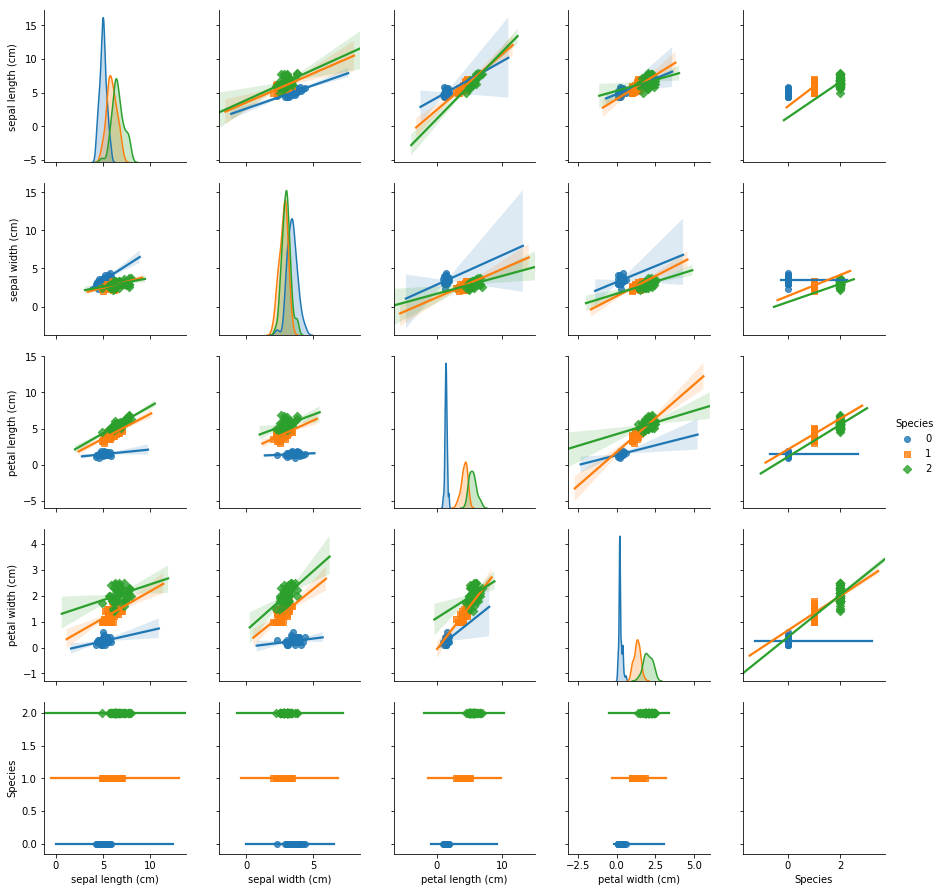

In [46]:
sns.pairplot(df_with_target,kind='reg',hue='Species',markers=["o", "s", "D"])

In [59]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [69]:
x_train.shape

(120, 4)

In [91]:
y_train.resize(120,1)

In [84]:
y_train.shape

(120, 1)

In [85]:
x_test.shape

(30, 4)

In [104]:
y_test.resize(30,1)

In [105]:
y_test.shape

(30, 1)

In [112]:
def find_accuracy_conf_matrix(y_test,pred):
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred))    
    print('accuracy is ',accuracy_score(y_test,pred)*100)

In [113]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
find_accuracy_conf_matrix(y_test,knn.predict(x_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.88      0.88         8
           2       0.92      0.92      0.92        12

   micro avg       0.93      0.93      0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

[[10  0  0]
 [ 0  7  1]
 [ 0  1 11]]
accuracy is  93.33333333333333


/home/deepanshu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [114]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
find_accuracy_conf_matrix(y_test,log_reg.predict(x_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.88      0.88         8
           2       0.92      0.92      0.92        12

   micro avg       0.93      0.93      0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

[[10  0  0]
 [ 0  7  1]
 [ 0  1 11]]
accuracy is  93.33333333333333


/home/deepanshu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/deepanshu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/deepanshu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [115]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
find_accuracy_conf_matrix(y_test,tree.predict(x_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.86      0.75      0.80         8
           2       0.85      0.92      0.88        12

   micro avg       0.90      0.90      0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30

[[10  0  0]
 [ 0  6  2]
 [ 0  1 11]]
accuracy is  90.0
